<a href="https://colab.research.google.com/github/vincent4u/Rocket-Landing-Game-Neural-Network-Implementation/blob/main/MLP%3A%20Feedforward%20and%20Backpropagation%20Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#note this work was done on google
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# uploading the csv_file
from google.colab import files
uploaded = files.upload()


Saving ce889_dataCollection.csv to ce889_dataCollection.csv


In [ ]:
# naming the csv_file
game_csv ="/content/ce889_dataCollection.csv"
data1 = pd.read_csv(game_csv)

Early stopping at epoch 87
Early stopping at epoch 88
Early stopping at epoch 89
Early stopping at epoch 90
Early stopping at epoch 91
Early stopping at epoch 92
Early stopping at epoch 93
Early stopping at epoch 94
Early stopping at epoch 95
Early stopping at epoch 96
Early stopping at epoch 97
Early stopping at epoch 98
Early stopping at epoch 99
Early stopping at epoch 100


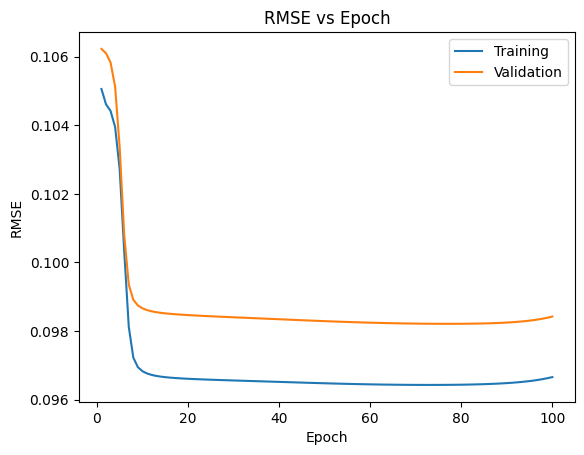

Best epoch: 77
Lowest RMSE: 0.09820924179918226
Best weight1:
 [[ 1.02418198 -1.89588466]
 [-0.16593466 -0.52781852]]
Best weight2:
 [[-0.0980339   2.80580964]
 [ 1.17964392 -6.04871697]]
Outputs on testing dataset:
[[0.54896307 0.51347374]
 [0.54775102 0.52185682]
 [0.55329431 0.49156171]
 ...
 [0.54569059 0.53159827]
 [0.55336832 0.49405926]
 [0.54801098 0.52288553]]


In [ ]:
#creating a list of the inputs and target features
list_of_inputs = []
list_of_targets = []

for index, row in data1.iterrows():
    sublist1 = [row['x'], row['y']]
    sublist2 = [row['vx'], row['vy']]
    list_of_inputs.append(sublist1)
    list_of_targets.append(sublist2)


# Splitting the data into 70%, 15%, and 15% splits
x_train, x_test, y_train, y_test = train_test_split(list_of_inputs, list_of_targets, test_size=0.3, random_state=1)
#x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=1)

# Converting the lists to NumPy arrays
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Normalizing on x_train
x_train_min = np.min(x_train)
x_train_max = np.max(x_train)
x_train_normalized = (x_train - x_train_min) / (x_train_max - x_train_min)

# Normalizing on x_val
x_val_min = np.min(x_val)
x_val_max = np.max(x_val)
x_val_normalized = (x_val - x_val_min) / (x_val_max - x_val_min)

# Normalizing on x_test
x_test_min = np.min(x_test)
x_test_max = np.max(x_test)
x_test_normalized = (x_test - x_test_min) / (x_test_max - x_test_min)

# Normalizing on y_train
y_train_min = np.min(y_train)
y_train_max = np.max(y_train)
y_train_normalized = (y_train - y_train_min) / (y_train_max - y_train_min)

# Normalizing on y_val
y_val_min = np.min(y_val)
y_val_max = np.max(y_val)
y_val_normalized = (y_val - y_val_min) / (y_val_max - y_val_min)

# Normalizing on y_test
y_test_min = np.min(y_test)
y_test_max = np.max(y_test)
y_test_normalized = (y_test - y_test_min) / (y_test_max - y_test_min)

X_train = x_train_normalized
Y_train = y_train_normalized


X_val = x_val_normalized
Y_val = y_val_normalized

x_test = x_test_normalized
y_test = y_test_normalized

#implementing the neural network
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(11)

#the neural network class
class NN:
    def __init__(self, learn_rate=0.1, lamda=0.8, input_nodes=2, hidden_nodes=2, output_nodes=2):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learn_rate = learn_rate
        self.lamda = lamda

        #selecting random weight depending on shape(input_nodesd, hidden_nodes)
        self.weight1 = np.random.uniform(-1, 1, size=(self.input_nodes, self.hidden_nodes))
        self.weight2 = np.random.uniform(-1, 1, size=(self.hidden_nodes, self.output_nodes))
        self.activated_hidden_output1 = None
        self.activated_hidden_output2 = None

        #function of the activation sigmoid function
    def __sigmoid(self, hidden_input):
        return 1 / (1 + np.exp(-1 * self.lamda * hidden_input))

      #function for gradient in the output and hidden nodes
    def __sigmoid_derivative(self, x):
        return self.lamda * x * (1 - x)

      #the feedforwrd propagation
    def forward_propagation(self, input):
        X_input = input
        hidden_input1 = np.dot(X_input, self.weight1)
        self.activated_hidden_output1 = self.__sigmoid(hidden_input1)

        hidden_input2 = np.dot(self.activated_hidden_output1, self.weight2)
        self.activated_hidden_output2 = self.__sigmoid(hidden_input2)

        return self.activated_hidden_output2

        #the backward propagation
    def backpropagation(self, input, target):
        X_input = input
        Y_output = target
        predicted_output = self.forward_propagation(X_input)                                          #ascribing the predicted_output to the return of the feedforward
        error_output = Y_output - predicted_output                                                    #calculating the error
        delta_y = error_output * self.__sigmoid_derivative(predicted_output)                          #implementing the gradient function on y_output

        error_hidden2 = delta_y.dot(self.weight2.T)                                                   #multiplying the weights2 with the delta_y ie.y_gradient
        delta_hidden2 = error_hidden2 * self.__sigmoid_derivative(self.activated_hidden_output2)      #completing the gradient at the hidden_nodes2

        error_hidden1 = delta_hidden2.dot(self.weight1.T)
        delta_hidden1 = error_hidden1 * self.__sigmoid_derivative(self.activated_hidden_output1)      #completing the gradient at the hidden_nodes1

        #implementing the weights adjustments using the gradient_h and gradient_y
        weight2_adjustment = self.learn_rate * np.outer(self.activated_hidden_output1, delta_y)
        weight1_adjustment = self.learn_rate * np.outer(X_input, delta_hidden1)

        self.weight2 += weight2_adjustment
        self.weight1 += weight1_adjustment

        #Training the dataset, utilizing epochs and early_stoping criteria
    def training(self, X_input, Y_input, X_val, Y_val, num_epochs, early_stopping_patience=10):
        rmse_values_train = []          #appending RMSE per error per epocch
        rmse_values_val = []
        best_epoch = -1
        lowest_rmse_val = float('inf')
        best_weight1 = None
        best_weight2 = None
        no_improvement_count = 0

        for epoch in range(num_epochs):     #training and Validating the NN over a specified number of epochs
            errors_train = []
            errors_val = []

            for i in range(len(X_input)):
                input = X_input[i]
                target = Y_input[i]
                output = self.forward_propagation(input)
                self.backpropagation(input, target)
                output_after_bp = self.forward_propagation(input)
                error_train = target - output_after_bp
                errors_train.append(error_train)

            for i in range(len(X_test)):
                input = x_test[i]
                target = y_test[i]
                output_val = self.forward_propagation(input)
                error_val = target - output_val
                errors_val.append(error_val)

            rmse_train = np.sqrt(np.mean(np.square(errors_train)))
            rmse_val = np.sqrt(np.mean(np.square(errors_val)))
            rmse_values_train.append(rmse_train)
            rmse_values_val.append(rmse_val)

            if rmse_val < lowest_rmse_val:
                lowest_rmse_val = rmse_val
                best_epoch = epoch
                best_weight1 = np.copy(self.weight1)
                best_weight2 = np.copy(self.weight2)
                no_improvement_count = 0
            else:
                no_improvement_count += 1
                if no_improvement_count >= early_stopping_patience:             #implementing a stopping criterial
                    print("Early stopping at epoch", epoch + 1)

        self.plot_rmse_vs_epoch(num_epochs, rmse_values_train, rmse_values_val)

        self.best_epoch = best_epoch
        self.lowest_rmse = lowest_rmse_val
        self.best_weight1 = best_weight1
        self.best_weight2 = best_weight2

    def plot_rmse_vs_epoch(self, num_epochs, rmse_values_train, rmse_values_val):
        epochs = np.arange(1, num_epochs + 1)
        plt.plot(epochs, rmse_values_train, label='Training')
        plt.plot(epochs, rmse_values_val, label='Validation')
        plt.xlabel("Epoch")
        plt.ylabel("RMSE")
        plt.title("RMSE vs Epoch")
        plt.legend()
        plt.show()

    def forward_propagation_testing(self, input):
        return self.forward_propagation(input)

if __name__ == "__main__":

    X_input=X_train
    Y_input=Y_train
    num_epochs = 100

    mlp = NN()
    mlp.training(X_train, Y_train, x_test, y_test, num_epochs, early_stopping_patience=10)

    best_epoch = mlp.best_epoch
    lowest_rmse = mlp.lowest_rmse
    best_weight1 = mlp.best_weight1
    best_weight2 = mlp.best_weight2

    print("Best epoch:", best_epoch + 1)
    print("Lowest RMSE:", lowest_rmse)
    print("Best weight1:\n", best_weight1)
    print("Best weight2:\n", best_weight2)

    X_test = x_test
    Y_test=y_test

    # Create a new instance of NN with the best weights
    mlp_best = NN()
    mlp_best.weight1 = best_weight1
    mlp_best.weight2 = best_weight2

    # Perform forward propagation on the testing dataset using the best weights
    outputs = mlp_best.forward_propagation_testing(X_test)

    # Print the outputs
    print("Outputs on testing dataset:")
    print(outputs)